# Group 4- Bob, Kaitlin, Stephen

In [1]:
import pandas as pd

In [2]:
df_iowa = pd.read_csv('iowa.zip')
df_iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-33202600018,01/04/2021,5336,Express Mart,4804 S Highway 61,Muscatine,52761.0,NaN,70.0,MUSCATINE,...,73055,Rumchata,12,750,13.50,20.25,3,60.75,2.25,0.59
1,INV-33190700004,01/04/2021,5650,The Depot Williamsburg,103 Highland St,Williamsburg,52361.0,NaN,48.0,IOWA,...,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,4,44.12,0.20,0.05
2,INV-33169600155,01/04/2021,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315.0,NaN,77.0,POLK,...,89242,Corralejo Reposado,6,750,16.00,24.00,6,144.00,4.50,1.18
3,INV-33174300034,01/04/2021,5347,Kum & Go #1097 / 50th WDM,220 50th St,West Des Moines,50265.0,POINT (-93.770919 41.572085),77.0,POLK,...,11771,Black Velvet Mini,8,50,8.50,12.75,3,38.25,0.15,0.03
4,INV-33194400030,01/04/2021,4070,Grieder Beverage Depot,708 13th St,Belle Plaine,52208.0,POINT (-92.278 41.897054),6.0,BENTON,...,54448,Paramount Apricot Brandy,6,1750,11.29,16.94,3,50.82,5.25,1.38


In [ ]:
#1 below

In [3]:
df_iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616459 entries, 0 to 616458
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    616459 non-null  object 
 1   Date                   616459 non-null  object 
 2   Store Number           616459 non-null  int64  
 3   Store Name             616459 non-null  object 
 4   Address                616394 non-null  object 
 5   City                   616394 non-null  object 
 6   Zip Code               616394 non-null  float64
 7   Store Location         557910 non-null  object 
 8   County Number          616394 non-null  float64
 9   County                 616394 non-null  object 
 10  Category               616459 non-null  int64  
 11  Category Name          616459 non-null  object 
 12  Vendor Number          616456 non-null  float64
 13  Vendor Name            616456 non-null  object 
 14  Item Number            616459 non-nu

In [27]:
#number of rows and columns
df_iowa.shape

(616391, 23)

In [4]:

#change coulmn names
df_iowa.columns = df_iowa.columns.str.replace(' ', '_').str.lower()
#change column type for date
df_iowa['date'] = pd.to_datetime(df_iowa['date'])
df_iowa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616459 entries, 0 to 616458
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   invoice/item_number    616459 non-null  object        
 1   date                   616459 non-null  datetime64[ns]
 2   store_number           616459 non-null  int64         
 3   store_name             616459 non-null  object        
 4   address                616394 non-null  object        
 5   city                   616394 non-null  object        
 6   zip_code               616394 non-null  float64       
 7   store_location         557910 non-null  object        
 8   county_number          616394 non-null  float64       
 9   county                 616394 non-null  object        
 10  category               616459 non-null  int64         
 11  category_name          616459 non-null  object        
 12  vendor_number          616456 non-null  floa

In [ ]:
#2 below

In [5]:
#null values
df_iowa.isnull().sum()

invoice/item_number          0
date                         0
store_number                 0
store_name                   0
address                     65
city                        65
zip_code                    65
store_location           58549
county_number               65
county                      65
category                     0
category_name                0
vendor_number                3
vendor_name                  3
item_number                  0
item_description             0
pack                         0
bottle_volume_(ml)           0
state_bottle_cost            0
state_bottle_retail          0
bottles_sold                 0
sale_(dollars)               0
volume_sold_(liters)         0
volume_sold_(gallons)        0
dtype: int64

In [6]:
#drop column with lots of null values
df_iowa.drop(['store_location'], axis = 1, inplace = True)

In [7]:
#drop rows with null values
df_iowa.dropna(inplace=True)

In [8]:
#double checking null values
df_iowa.isnull().sum()

invoice/item_number      0
date                     0
store_number             0
store_name               0
address                  0
city                     0
zip_code                 0
county_number            0
county                   0
category                 0
category_name            0
vendor_number            0
vendor_name              0
item_number              0
item_description         0
pack                     0
bottle_volume_(ml)       0
state_bottle_cost        0
state_bottle_retail      0
bottles_sold             0
sale_(dollars)           0
volume_sold_(liters)     0
volume_sold_(gallons)    0
dtype: int64

In [9]:
#dropping columns we don't need
df_iowa.drop(['county_number', 'vendor_number'], axis = 1, inplace = True)

In [10]:
#checking duplicate values in Primary key
df_iowa['invoice/item_number'].duplicated().sum()

0

In [11]:
#3- finding invoice number
df_iowa['invoice/item_number'].str[:-5]

0         INV-332026
1         INV-331907
2         INV-331696
3         INV-331743
4         INV-331944
             ...    
616454    INV-354727
616455    INV-354747
616456    INV-354794
616457    INV-354714
616458    INV-354769
Name: invoice/item_number, Length: 616391, dtype: object

In [12]:
#3- creating new invoice column
df_iowa["invoice_number"] = df_iowa['invoice/item_number'].str[:-5]
df_iowa.head()

,invoice/item_number,date,store_number,store_name,address,city,zip_code,county,category,category_name,...,item_description,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),volume_sold_(gallons),invoice_number
0,INV-33202600018,2021-01-04,5336,Express Mart,4804 S Highway 61,Muscatine,52761.0,MUSCATINE,1081200,Cream Liqueurs,...,Rumchata,12,750,13.50,20.25,3,60.75,2.25,0.59,INV-332026
1,INV-33190700004,2021-01-04,5650,The Depot Williamsburg,103 Highland St,Williamsburg,52361.0,IOWA,1012100,Canadian Whiskies,...,Crown Royal Regal Apple Mini,10,50,7.35,11.03,4,44.12,0.20,0.05,INV-331907
2,INV-33169600155,2021-01-04,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315.0,POLK,1022200,100% Agave Tequila,...,Corralejo Reposado,6,750,16.00,24.00,6,144.00,4.50,1.18,INV-331696
3,INV-33174300034,2021-01-04,5347,Kum & Go #1097 / 50th WDM,220 50th St,West Des Moines,50265.0,POLK,1012100,Canadian Whiskies,...,Black Velvet Mini,8,50,8.50,12.75,3,38.25,0.15,0.03,INV-331743
4,INV-33194400030,2021-01-04,4070,Grieder Beverage Depot,708 13th St,Belle Plaine,52208.0,BENTON,1051100,American Brandies,...,Paramount Apricot Brandy,6,1750,11.29,16.94,3,50.82,5.25,1.38,INV-331944


In [13]:
#4- new mail address column
df_iowa['mail_address'] = df_iowa['address'] +', '+ df_iowa['city']+ ', ' +'IA' + ', ' +df_iowa['zip_code'].astype(str)
df_iowa.head()

,invoice/item_number,date,store_number,store_name,address,city,zip_code,county,category,category_name,...,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),volume_sold_(gallons),invoice_number,mail_address
0,INV-33202600018,2021-01-04,5336,Express Mart,4804 S Highway 61,Muscatine,52761.0,MUSCATINE,1081200,Cream Liqueurs,...,12,750,13.50,20.25,3,60.75,2.25,0.59,INV-332026,"4804 S Highway 61, Muscatine, IA, 52761.0"
1,INV-33190700004,2021-01-04,5650,The Depot Williamsburg,103 Highland St,Williamsburg,52361.0,IOWA,1012100,Canadian Whiskies,...,10,50,7.35,11.03,4,44.12,0.20,0.05,INV-331907,"103 Highland St, Williamsburg, IA, 52361.0"
2,INV-33169600155,2021-01-04,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315.0,POLK,1022200,100% Agave Tequila,...,6,750,16.00,24.00,6,144.00,4.50,1.18,INV-331696,"3221 SE 14th St, Des Moines, IA, 50315.0"
3,INV-33174300034,2021-01-04,5347,Kum & Go #1097 / 50th WDM,220 50th St,West Des Moines,50265.0,POLK,1012100,Canadian Whiskies,...,8,50,8.50,12.75,3,38.25,0.15,0.03,INV-331743,"220 50th St, West Des Moines, IA, 50265.0"
4,INV-33194400030,2021-01-04,4070,Grieder Beverage Depot,708 13th St,Belle Plaine,52208.0,BENTON,1051100,American Brandies,...,6,1750,11.29,16.94,3,50.82,5.25,1.38,INV-331944,"708 13th St, Belle Plaine, IA, 52208.0"


In [14]:
#question number 5
#a small percentage of high margin sales comes from vodka
df_iowa[(((df_iowa.state_bottle_retail - df_iowa.state_bottle_cost) > 10) 
 & df_iowa.item_description.str.contains('Vodka'))].item_description.value_counts() 

Crystal Head Vodka                           119
Belvedere Pure Vodka                          70
Blue Ox Vodka Mini                            59
Crystal Head Aurora Vodka                     45
Figenza Mediterranean Fig Vodka               34
Crystal Head  Pride Bottle Vodka              22
E.T.51 Premium Vodka Mini                      4
45th Parallel Vodka                            3
Okoboji Vodka                                  3
Beluga Gold Line Vodka                         2
Neft Vodka Black                               1
Neft Vodka White                               1
OYO Stone Fruit Vodka                          1
Double Cross Vodka                             1
AO Vodka                                       1
Deep   Eddy  Vodka Mini                        1
Platinum 7X Vodka Candy Cane                   1
Polugar No. 2 Garlic & Pepper Vodka 750ml      1
Name: item_description, dtype: int64

In [15]:
#6 average profit
df_iowa.state_bottle_retail.mean() - df_iowa.state_bottle_cost.mean()

5.554750994088673

Text(0, 0.5, 'Bottles Sold')

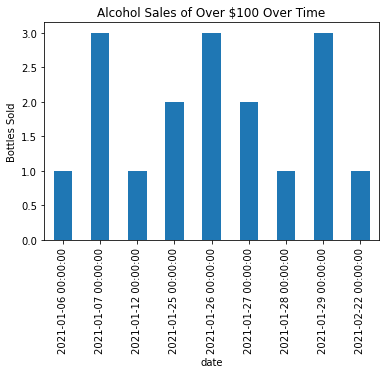

In [25]:
#6 Premium alcohol sales over time
df_iowa[(df_iowa.state_bottle_retail - df_iowa.state_bottle_cost) > 100].groupby('date').agg('bottles_sold').sum().plot(kind='bar', x='date', y='botles_sold',title='Alcohol Sales of Over $100 Over Time').set_ylabel("Bottles Sold")

In [28]:
#7 save as a pickle file
df_iowa.to_pickle('iowa.pickle')